# **Linear regression Model Interpretability Statistical**

## **1. Abstract**

Making a machine trustworthy and reliable is one of the most important goals of data science today. Models are many times used as black boxes, wherein we give a particular input, know little of what happens inside the model, and get an output.
So aim of the notebook is intrepret the Linear regression model.

The insurance risk are important point of estimation for the insurance company. The aim of the notebook is to find the factors affecting the this and creating a regression model to predict this.



## **2. Importing necessary libraries**

In [1]:
import numpy as np
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestRegressor

## **3. Data Loading and Preprocessing**

In [2]:
#Reading the insurance data

data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### **3.1. Encoding the sex and  smoker**


**Sex**

Male = 0

Female = 1

**Smoker**

Yes = 1

No = 0


In [3]:

data['sex'] = data.sex.map({'male':0, 'female':1})

data['smoker'] = data.smoker.map({'no':0, 'yes':1})

data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [4]:
data.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

## **3.2. One Hot Encoding**

### **Region**

    1.Southwest
    
    2.Southeast
    
    3.Northwest
    
    4.Northeast


In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [6]:
# creating instance of one-hot-encoder
enc = OneHotEncoder()
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['region']]).toarray())
enc_df
enc_df.columns = ['northeast','northwest','southeast','southwest'] 

enc_df.apply(np.int64)
data =data.join(enc_df)
data=data.drop(['region'],axis=1)
data

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0.0,1.0,0.0,0.0
1334,18,1,31.920,0,0,2205.98080,1.0,0.0,0.0,0.0
1335,18,1,36.850,0,0,1629.83350,0.0,0.0,1.0,0.0
1336,21,1,25.800,0,0,2007.94500,0.0,0.0,0.0,1.0


## **3.3. Noramlizing the data**

In [7]:


from sklearn import preprocessing

# Create x, where x the 'scores' column's values as floats
x = data[['charges','bmi','age']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[['charges','bmi','age']] = pd.DataFrame(x_scaled)



In [8]:
#looking at data head after adding dummy variables and nromalizing
data.head(20)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,0.021739,1,0.321227,0,1,0.251611,0.0,0.0,0.0,1.0
1,0.000000,0,0.479150,1,0,0.009636,0.0,0.0,1.0,0.0
2,0.217391,0,0.458434,3,0,0.053115,0.0,0.0,1.0,0.0
3,0.326087,0,0.181464,0,0,0.333010,0.0,1.0,0.0,0.0
4,0.304348,0,0.347592,0,0,0.043816,0.0,1.0,0.0,0.0
5,0.282609,1,0.263115,0,0,0.042056,0.0,0.0,1.0,0.0
6,0.608696,1,0.470272,1,0,0.113629,0.0,0.0,1.0,0.0
7,0.413043,1,0.316922,3,0,0.098320,0.0,1.0,0.0,0.0
8,0.413043,0,0.373150,2,0,0.084352,1.0,0.0,0.0,0.0
9,0.913043,1,0.265806,0,0,0.443765,0.0,1.0,0.0,0.0


In [9]:
#finding the correlation between all the features in the data
data.corr()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.299008,0.002475,-0.000407,-0.011642,0.010016
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.057292,0.002425,0.011156,-0.017117,0.004184
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.198341,-0.138156,-0.135996,0.270025,-0.006205
children,0.042469,-0.017163,0.012759,1.000000,0.007673,0.067998,-0.022808,0.024806,-0.023066,0.021914
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.787251,0.002811,-0.036945,0.068498,-0.036945
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,1.000000,0.006349,-0.039905,0.073982,-0.043210
northeast,0.002475,0.002425,-0.138156,-0.022808,0.002811,0.006349,1.000000,-0.320177,-0.345561,-0.320177
northwest,-0.000407,0.011156,-0.135996,0.024806,-0.036945,-0.039905,-0.320177,1.000000,-0.346265,-0.320829
southeast,-0.011642,-0.017117,0.270025,-0.023066,0.068498,0.073982,-0.345561,-0.346265,1.000000,-0.346265
southwest,0.010016,0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320177,-0.320829,-0.346265,1.000000


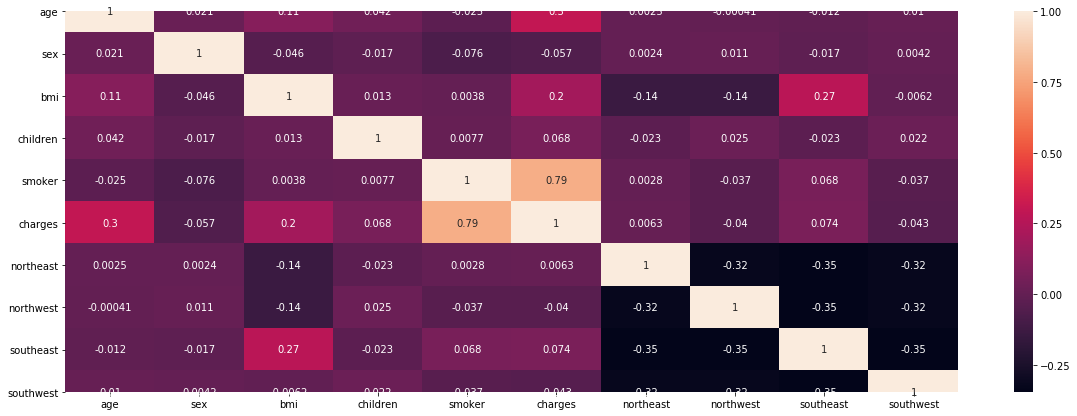

In [10]:
#plotting the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True)

## **4. Ordinary Least Squares**

Ordinary Least Squares (OLS) is the most common estimation method for linear models

In [11]:
#Using OLS for finding the p value and t statistics 
import statsmodels.api as sm

model = sm.OLS(data['charges'], data[['age', 'sex', 'bmi', 'children', 'smoker','northeast',
       'northwest', 'southeast', 'southwest']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Wed, 22 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:46:19   Log-Likelihood:                 1230.9
No. Observations:                1338   AIC:                            -2444.
Df Residuals:                    1329   BIC:                            -2397.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.1886      0.009     21.587      0.000       0.171       0.206
sex            0.0021      0.005      0.394      0.693      -0.008       0.013
bmi            0.2012      0.017     11.860      0.000       0.168       0.235
children       0.0076      0.002      3.451      0.001       0.003       0.012
smoker         0.3807      0.007     57.723      0.000       0.368       0.394
northeast     -0.0504      0.010     -5.277      0.000      -0.069      -0.032
northwest     -0.0560      0.010     -5.849      0.000      -0.075      -0.037
southeast     -0.0669      0.011     -6.280      0.000      -0.088      -0.046
southwest     -0.0657      0.010     -6.590      0.000      -0.085      -0.046
==============================================================================
Omnibus:                      300.366   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              718.887
Skew:                           1.211   Prob(JB):                    7.86e-157
Kurtosis:                       5.651   Cond. No.                         15.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **5. Pair Plot**

<Figure size 864x720 with 0 Axes>

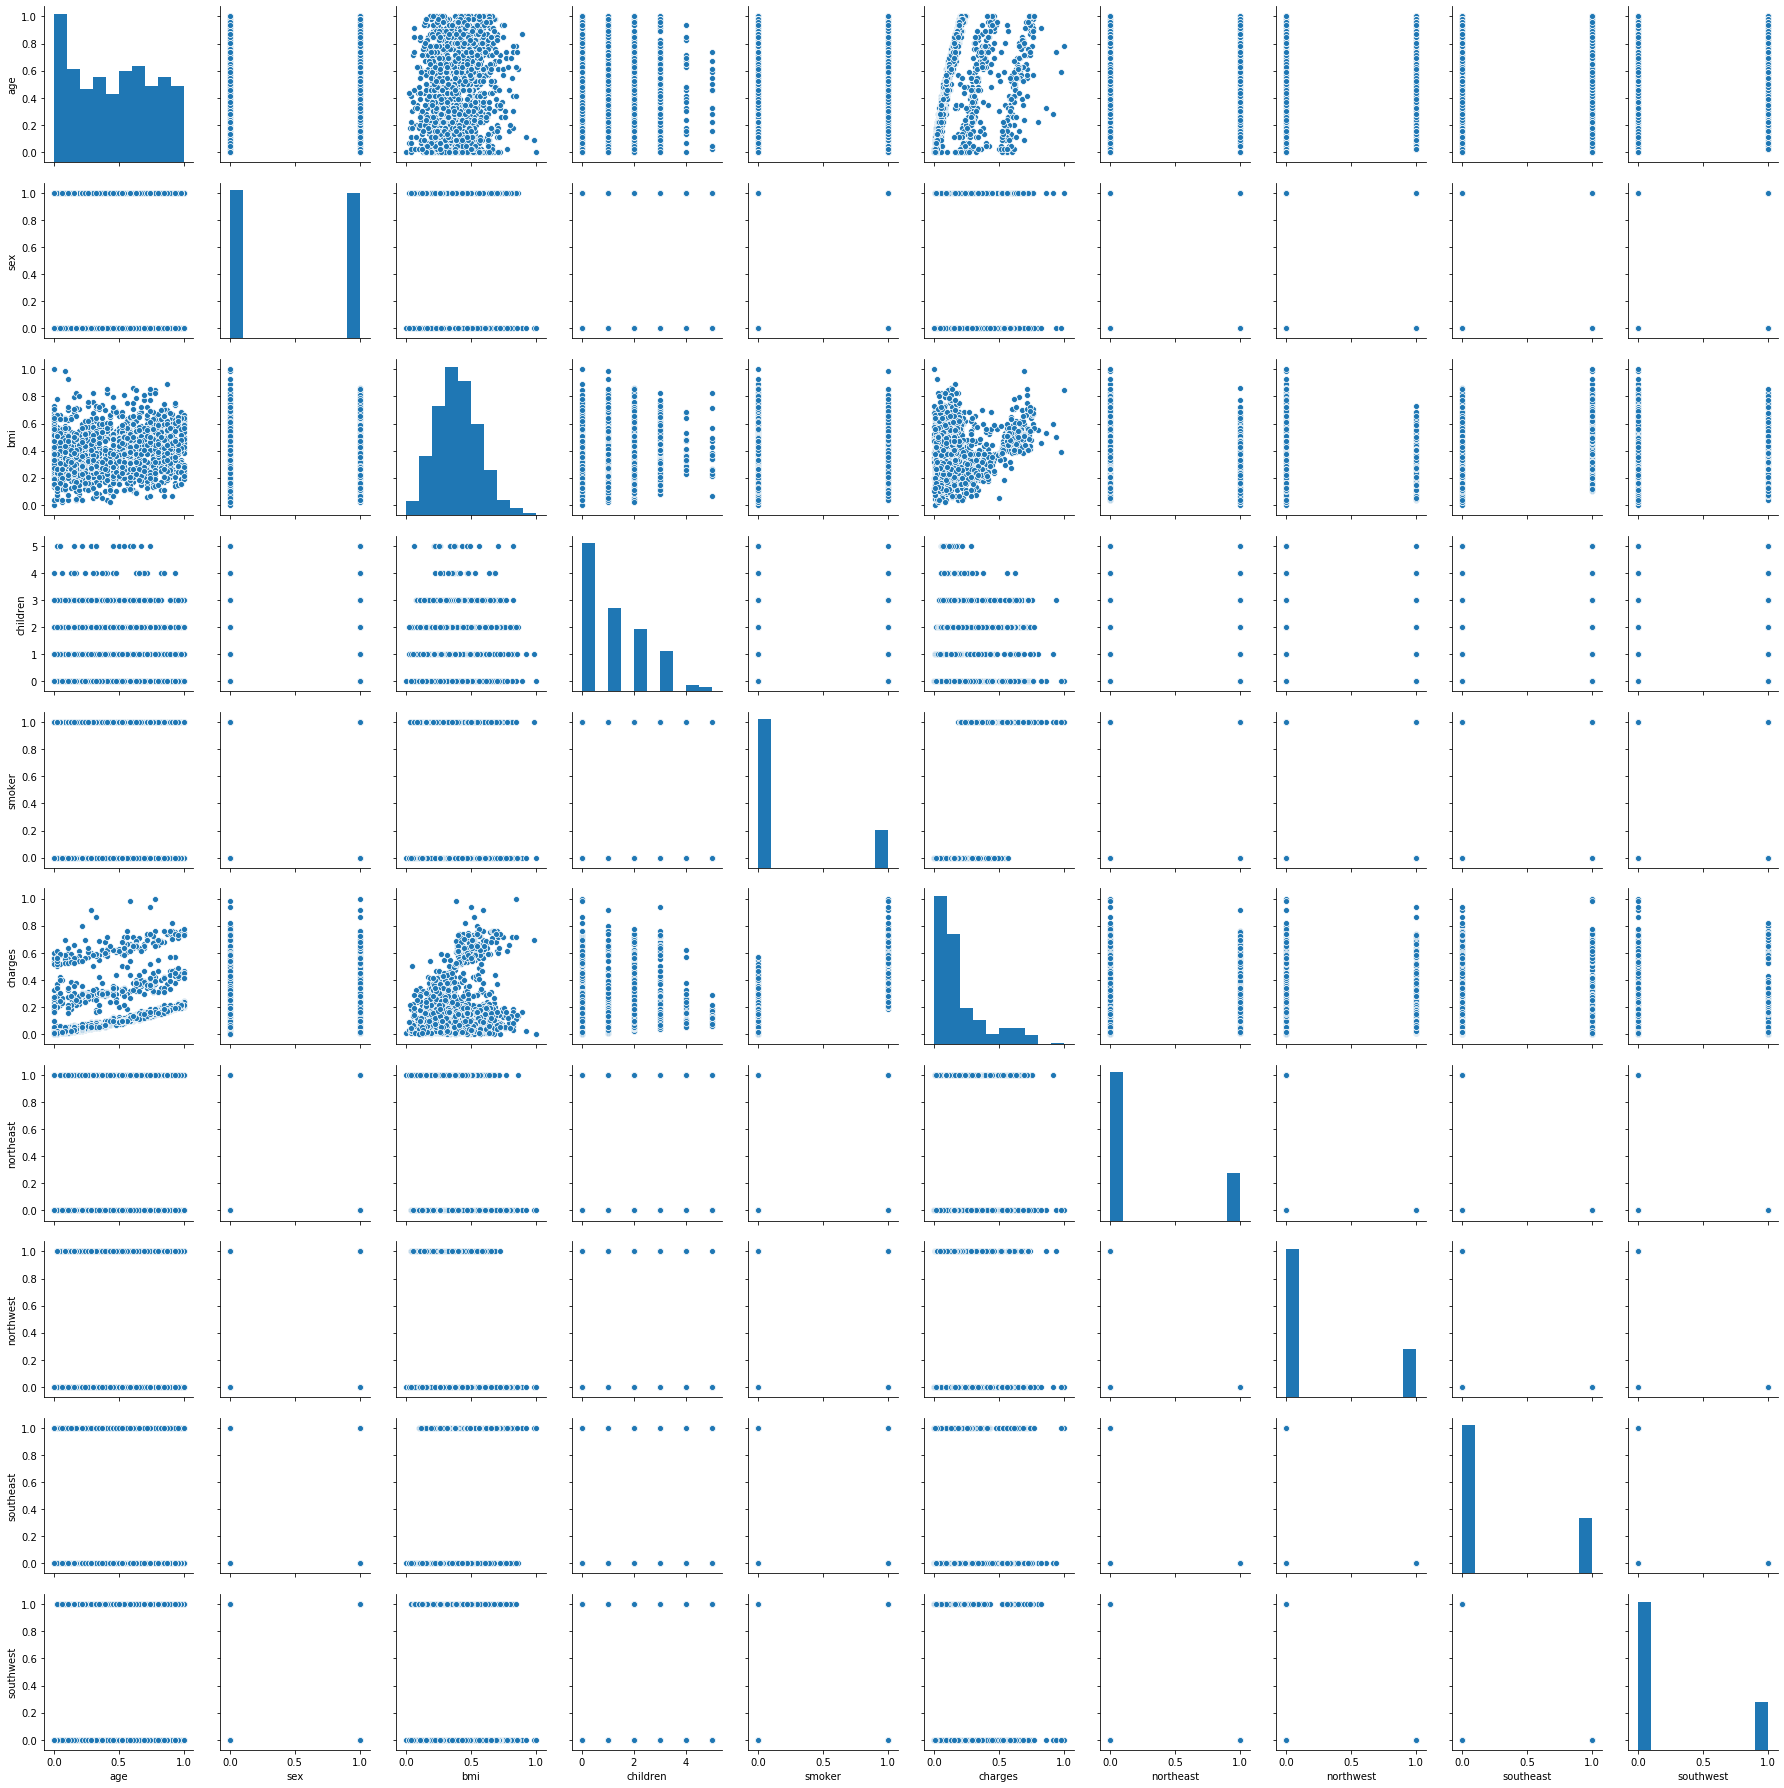

In [13]:
#pair plot
plt.figure(figsize=(12,10))
sns.pairplot(data) 

## **6. Train ,Validation and Test split**

Data is split into 3 parts 

Taining data set = 80.75%

Validation data set = 14.25%

Test data set = 5%

In [14]:
from sklearn.model_selection import  train_test_split

X = data[ ['age', 'bmi', 'children', 'smoker','northeast','northwest', 'southeast', 'southwest']]

y = data['charges']

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.05, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

## **7. Linear Regression**

In [15]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import r2_score 
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
model = regr.fit(X_train,y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_train)

In [17]:
#training Data
# The coefficients
Weights = regr.coef_
# The mean squared error
print('Mean squared error on the Training dataset: %.2f'% mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score for Training dataset : %.2f'% r2_score(y_train, y_pred))


Mean squared error on the Training dataset: 0.01
R2 score for Training dataset : 0.76


In [18]:
# Make predictions using the testing set
y_pred = regr.predict(X_val)


# The mean squared error
print('Mean squared error on the Validation dataset : %.2f'% mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2 score for Validation dataset : %.2f'% r2_score(y_val, y_pred))


Mean squared error on the Validation dataset : 0.01
R2 score for Validation dataset : 0.75


## **8. Weight Plot**

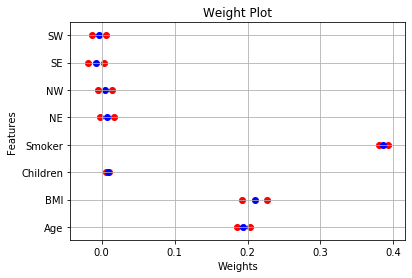

In [19]:
import matplotlib.pyplot as plt
y = ['Age', 'BMI', 'Children', 'Smoker','NE','NW', 'SE', 'SW']
x11 = 0.19408313 - 0.008737
x12 = 0.19408313 + 0.008737
x21 = 0.20984652 - 0.016968 
x22 = 0.20984652 + 0.016968
x31 = 0.00826385 - 0.002200
x32 = 0.00826385 + 0.002200
x41 = 0.38621824 - 0.006595
x42 = 0.38621824 + 0.006595
x51 = 0.00680938 - 0.009542
x52 = 0.00680938 + 0.009542
x61 = 0.00404478 - 0.009573
x62 = 0.00404478 + 0.009573
x71 = -0.00755364 - 0.010649
x72 = -0.00755364 + 0.010649
x81 = -0.00330052 - 0.009967
x82 = -0.00330052 + 0.009967
x = [(x11,x12),(x21,x22),(x31,x32),(x41,x42),(x51,x52),(x61,x62),(x71,x72),(x81,x82)]


for xe, ye in zip(x, y):
    plt.scatter(xe, [ye] * len(xe), color='red')

plt.title('Weight Plot')
plt.xlabel('Weights')
plt.ylabel('Features')
plt.scatter(regr.coef_,y, color='blue')
plt.grid(True)
plt.show()

## **7. Conclusion**

The linear regression model is trained and interpreted based on p-value and those features with a p-value above 0.05 dropped as they do not affect. According to the weight plot, we can see the smoker feature is affecting most to the target output.


## **8. Refrence** 

1. https://www.statsmodels.org/stable/regression.html


Copyright 2020 Abhishek Gargha Maheshwarappa and Kartik Kumar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.